<a href="https://colab.research.google.com/github/ioannisp03/Brain_MRI_Classification/blob/main/BrainDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import files
files.upload()  # Choose the kaggle.json file from your computer

{}

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 92% 137M/149M [00:00<00:00, 224MB/s]
100% 149M/149M [00:00<00:00, 222MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("brain-tumor-mri-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("brain_tumor_dataset")

In [ ]:
import tensorflow as tf

# Load the dataset from the extracted folders, resizing images to 224 x 224
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "brain_tumor_dataset",  # Path to the dataset folder
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"  # This automatically labels based on folder names
)

Found 7023 files belonging to 2 classes.


In [ ]:
import os

# Path to the main dataset folder
dataset_path = "brain_tumor_dataset"

# List the subfolders within the main dataset folder
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    print(f"Category: {category}")
    print("Subfolder: ")
    if os.path.isdir(category_path):  # Check if it's a directory
        # List the secondary folders for each main category
        for subfolder in os.listdir(category_path):
            subfolder_path = os.path.join(category_path, subfolder)
            if os.path.isdir(subfolder_path):
                print("- " + subfolder)

Category: Testing
Subfolder: 
- notumor
- glioma
- meningioma
- pituitary
Category: Training
Subfolder: 
- notumor
- glioma
- meningioma
- pituitary


In [ ]:
#Find the average filesize of each image
import os

dir_path = 'brain_tumor_dataset'
total_size = 0
file_count = 0

# Iterate through files in the directory and all subdirectories
for root, dirs, files in os.walk(dir_path):
    for filename in files:
        # Construct the full file path
        file_path = os.path.join(root, filename)
        # Check if it is actually a file, not a directory
        if os.path.isfile(file_path):
            # Get the size of the file
            file_size = os.path.getsize(file_path)
            # Add to the total size
            total_size += file_size
            # Increment the file count
            file_count += 1

if file_count > 0:  # This check avoids division by zero
    average_size = total_size / file_count
    print(f'Average file size: {average_size / 1024:.2f} kilobytes')
else:
    print("No files found within the directory.")


Average file size: 22.05 kilobytes


Class Names: ['Testing', 'Training']


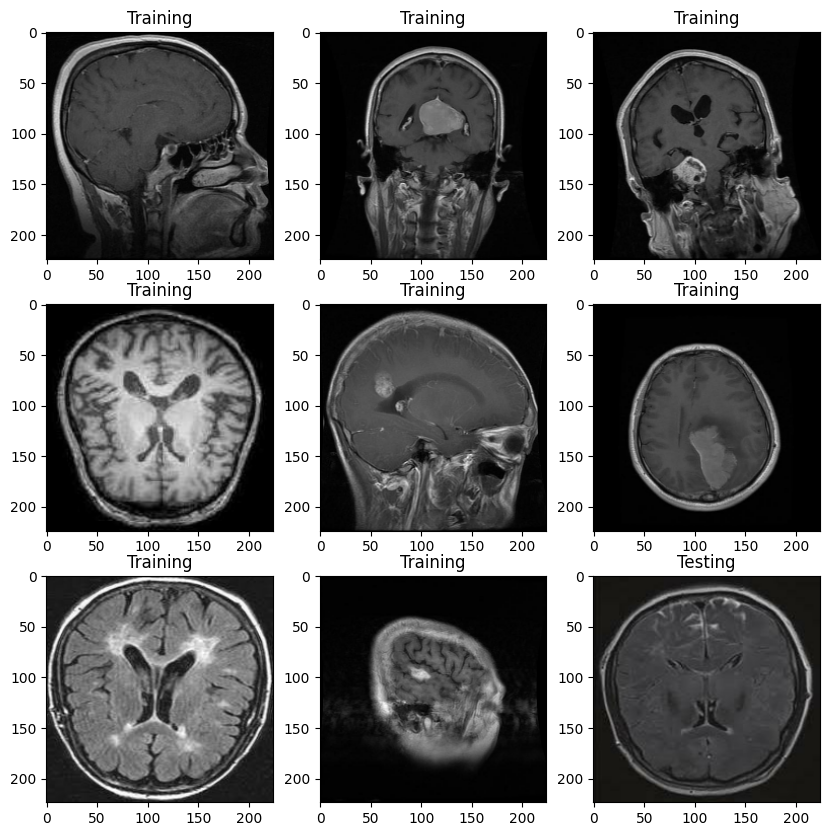

In [ ]:
class_names = train_ds.class_names
print("Class Names:", class_names)

# Display a batch of images and labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")